In [ ]:
# https://keras.io/getting_started/intro_to_keras_for_engineers/

In [11]:
import numpy as np
import os
import keras

In [4]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [22]:
# Carregar o conjunto de dados MNIST
(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()

# Escolha o índice da imagem que você deseja imprimir
i = 3

# Iterar sobre cada linha da imagem e imprimi-las em linhas separadas
for row in x_train[i]:
    print(' '.join([f'{pixel:3}' for pixel in row]))

# Imprimir a etiqueta correspondente
print(f'Label: {y_train[i]}')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 211  31   8   0   0   0   0 

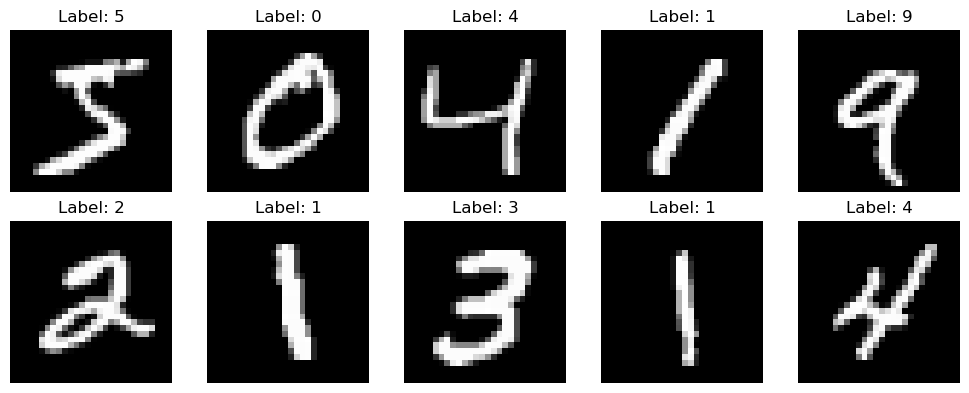

In [17]:
# Visualizar os primeiros exemplos do conjunto de treinamento
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

In [8]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.5338 - loss: 1.3190 - val_acc: 0.9503 - val_loss: 0.1811
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - acc: 0.9257 - loss: 0.2526 - val_acc: 0.9769 - val_loss: 0.0779
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - acc: 0.9552 - loss: 0.1578 - val_acc: 0.9771 - val_loss: 0.0770
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - acc: 0.9634 - loss: 0.1260 - val_acc: 0.9856 - val_loss: 0.0555
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - acc: 0.9697 - loss: 0.1030 - val_acc: 0.9856 - val_loss: 0.0564
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - acc: 0.9736 - loss: 0.0917 - val_acc: 0.9899 - val_loss: 0.0373
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - acc: 0.9757 - loss: 0.0809 - val_acc: 0.9887 - val_loss: 0.0381
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - acc: 0.9785 - loss: 0.0733 - val_acc: 0.9892 - val_loss: 0.0345
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [10]:
print(predictions)

[[1.2177086e-08 8.9458378e-11 5.1799757e-06 ... 9.9998593e-01
  1.5146119e-10 8.8710285e-06]
 [1.9357405e-08 2.6106064e-09 1.0000000e+00 ... 2.8639440e-09
  2.3399663e-10 4.7066488e-09]
 [4.3623618e-08 9.9988639e-01 1.4092428e-08 ... 7.5972152e-05
  1.3736707e-06 2.8932953e-07]
 ...
 [9.1748364e-16 4.0406292e-15 1.5064267e-15 ... 8.1771990e-21
  1.9536137e-09 3.0249185e-11]
 [1.5479433e-10 7.5928952e-18 8.3043650e-12 ... 1.3054418e-14
  2.2391900e-05 3.5055418e-08]
 [1.6907906e-11 8.4142643e-23 1.2497243e-08 ... 6.6085164e-30
  1.0433292e-09 3.8511278e-11]]
